In [43]:
import pandas as pd
import numpy as np
import shapely
import matplotlib.pyplot as plt
import geopandas as gpd

# precipitation_path = '../data/precipitation-trentino-data-availability.csv'
current_path = '../data/Nov_Grid_Current.csv'
grid_location_path = '../data/trentino-grid.geojson'

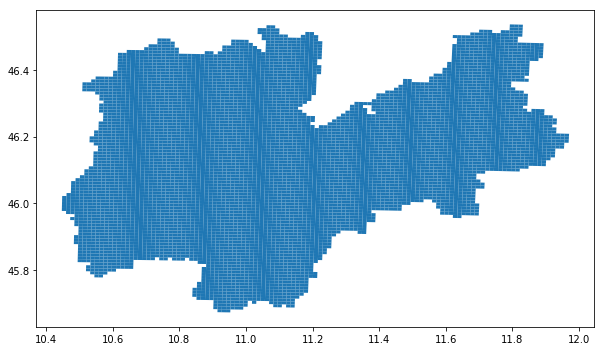

In [44]:
grids_df = gpd.read_file(grid_location_path)

grids_df.plot(figsize=(10,6))
plt.show()

In [45]:
# Load current values
current_df = pd.read_csv(current_path,parse_dates=['Time'])

In [46]:
# Set time as idx
current_df = current_df.set_index(['Time'])

In [47]:
grids_df.head()

,cellId,geometry
0,38,"POLYGON ((10.91462237795798 45.68200707615051,..."
1,39,"POLYGON ((10.92745626753757 45.68179119797432,..."
2,40,"POLYGON ((10.94029001069759 45.68157387892596,..."
3,154,"POLYGON ((10.90209331740145 45.69121738700915,..."
4,155,"POLYGON ((10.9149294074638 45.69100288283414, ..."


In [48]:
grids_df['center'] = grids_df['geometry'].apply(lambda P: P.centroid)

grids_df['xy'] = grids_df['center'].apply(lambda c: list(c.coords)[0])

In [49]:
grids_df['cellId'] = grids_df['cellId'].astype(str)

In [80]:
# Chosen cell id
cellId = ['5550','2972','5202','3215','5111']
c = []
for id_ in cellId:
    c.append(grids_df[grids_df['cellId'] == id_]['xy'].values[0])

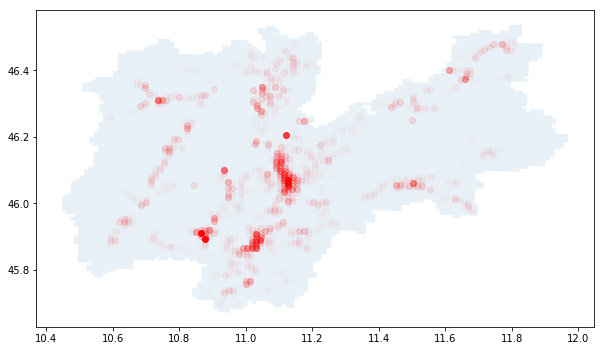

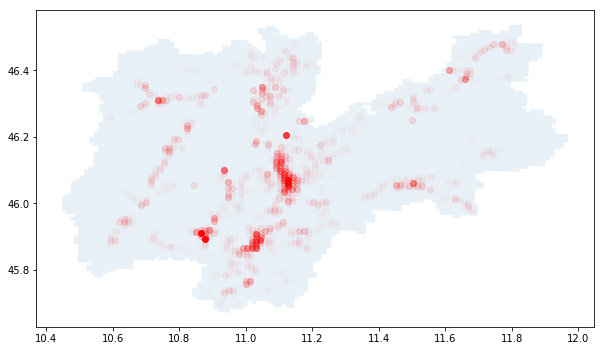

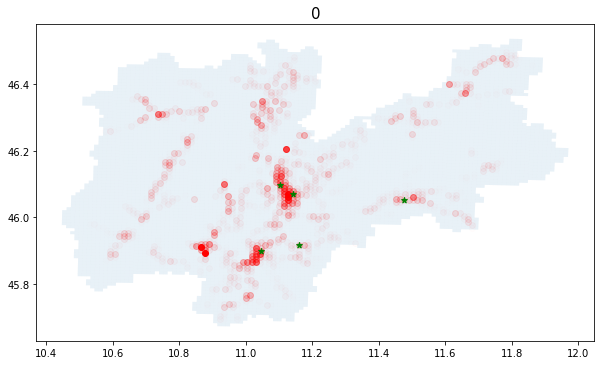

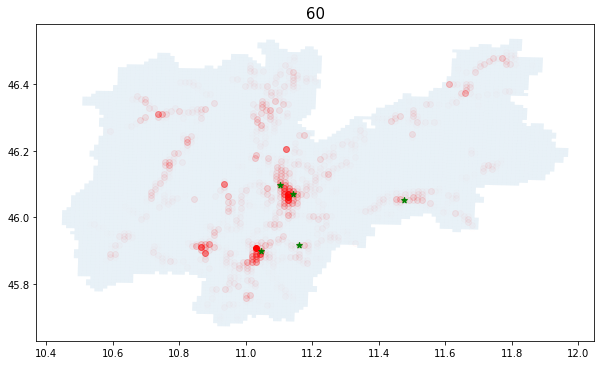

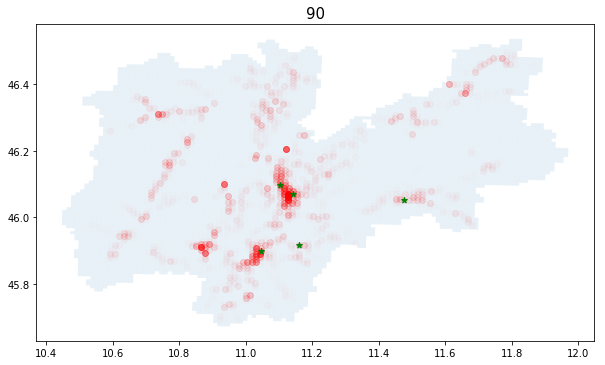

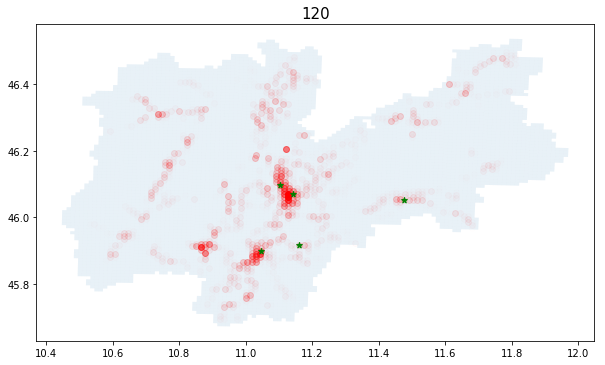

In [87]:
def visualize(grid_df,val_df,idx):
    
    centers, values = [], []
    for i in range(len(grid_df)):
        row = grid_df.iloc[i,:]
        if row['cellId'] in current_df.columns:
            centers.append(row['xy'])
            values.append(val_df[row['cellId']][idx])
    values = np.array(values) / np.max(values)

    grid_df.plot(figsize=(10,6), alpha=0.1)
    for val, center in zip(values, centers):
        x,y = center
        plt.scatter(x,y,alpha=val,color='red')

idxes = [0, 60, 90, 120]
# Visualize in different tiem
for idx in idxes:
    visualize(grids_df, current_df, idx)
    plt.scatter([r[0] for r in c],[r[1] for r in c],color='green',marker='*')
    plt.title(idx, fontsize=15)
    plt.show()

In [99]:
# Spacial 

cellId

['5550', '2972', '5202', '3215', '5111']

In [109]:
grids_df.head()

,cellId,geometry,center,xy
0,38,"POLYGON ((10.91462237795798 45.68200707615051,...",POINT (10.92088536743696 45.67740136275502),"(10.920885367436961, 45.67740136275502)"
1,39,"POLYGON ((10.92745626753757 45.68179119797432,...",POINT (10.93371815684027 45.67718479792302),"(10.933718156840275, 45.67718479792302)"
2,40,"POLYGON ((10.94029001069759 45.68157387892596,...",POINT (10.9465507993809 45.67696679246492),"(10.946550799380903, 45.676966792464924)"
3,154,"POLYGON ((10.90209331740145 45.69121738700915,...",POINT (10.90835836165269 45.68661233500849),"(10.908358361652688, 45.68661233500849)"
4,155,"POLYGON ((10.9149294074638 45.69100288283414, ...",POINT (10.92119335145374 45.68639714371787),"(10.921193351453743, 45.68639714371787)"


In [112]:
aaa = grids_df.set_index(['cellId']).loc[cellId]

In [ ]:
plt.scatter(row['xy'][0],row['xy'][1],label=row['cellId'])

In [116]:
aaa.apply(lambda row: ,axis=1)

geometry    POLYGON ((11.09730937733069 46.10183094395573,...
center            POINT (11.10360304725021 46.09721497194515)
xy                    (11.103603047250207, 46.09721497194515)
Name: 5550, dtype: object
geometry    POLYGON ((11.03830654780318 45.9048870983997, ...
center            POINT (11.04458349617359 45.90027451965202)
xy                    (11.04458349617359, 45.900274519652015)
Name: 2972, dtype: object
geometry    POLYGON ((11.13505565700832 46.0741305087431, ...
center            POINT (11.14134303378302 46.06951254588569)
xy                    (11.141343033783022, 46.06951254588569)
Name: 5202, dtype: object
geometry    POLYGON ((11.15495483460561 45.92074733404691,...
center            POINT (11.16122362162879 45.91612849654535)
xy                   (11.161223621628787, 45.916128496545355)
Name: 3215, dtype: object
geometry    POLYGON ((11.47058818302028 46.05836630317334,...
center            POINT (11.47684505870863 46.05373046278545)
xy                    (11.47

cellId
5550    None
2972    None
5202    None
3215    None
5111    None
dtype: object